In [ ]:
!pip install clean-text

     |████████████████████████████████| 53 kB 881 kB/s 
     |████████████████████████████████| 175 kB 11.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=646da04a7ccea5ed90c027d824c9c6b3e1622c278fe65dfdedab70ba89a1c724
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 5.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import glob
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import os
import csv
from cleantext import clean
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [ ]:
#Training data CSV read using pandas
training_path = '/content/train'
training_csv_files = glob.glob(training_path + "/*.csv")
training_df_list = (pd.read_csv(file, names=["sentence", "sentiment"], skipinitialspace=True, skiprows=1, engine="python") for file in training_csv_files)
training_big_df   = pd.concat(training_df_list, ignore_index=True)
training_big_df = training_big_df.drop(training_big_df[training_big_df.sentiment==2].index)

In [ ]:
#Check the training set
sentiment_train = training_big_df
sentiment_train.head()

,sentence,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,1
2,lokasi strategis di jalan sumatera bandung . t...,1
3,betapa bahagia nya diri ini saat unboxing pake...,1
4,duh . jadi mahasiswa jangan sombong dong . kas...,0
5,"makanan beragam , harga makanan di food stall ...",1


In [ ]:
#Convert training sentences from pandas dataframe to list
training_sentences_df_list = training_big_df.loc[:,'sentence']
training_sentences = training_sentences_df_list.values.tolist()
#print(training_sentences)

#Convert training labelss from pandas dataframe to list
training_labels_list = training_big_df.loc[:,'sentiment']
training_labels = training_labels_list.values.tolist()

#print(training_labels)

In [ ]:
print(len(sentiment_train))

9852


In [ ]:
#Test data CSV read using pandas
test_path = '/content/test'
test_csv_files = glob.glob(test_path + "/*.csv")
test_df_list = (pd.read_csv(file, names=["sentence", "sentiment"], skipinitialspace=True, skiprows=1, engine="python") for file in test_csv_files)
test_big_df   = pd.concat(test_df_list, ignore_index=True)
test_big_df = test_big_df.drop(test_big_df[test_big_df.sentiment==2].index)

In [ ]:
#Check the test set
sentiment_test = test_big_df
sentiment_test.head()

,sentence,sentiment
1,tidak enak,0
2,restoran ini menawarkan makanan sunda . kami m...,1
3,lokasi di alun alun masakan padang ini cukup t...,1
4,betapa bejad kader gerindra yang anggota dprd ...,0
5,kampiun bistro berada di jalan . kebon kawung ...,1


In [ ]:
print(len(sentiment_test))

1129


In [ ]:
training_size = len(sentiment_train)
test_size = len(sentiment_test)

# Split the sentences
training_sentences_split = training_sentences[:training_size]
testing_sentences_split = training_sentences[:test_size]

training_sentences = []

factory = StemmerFactory()
stemmer = factory.create_stemmer()

for i in training_sentences_split:
  url_remove = re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', '', i)
  url_remove = re.sub(r'http\S+', '', url_remove)
  url_remove = re.sub(r'@+', '', url_remove)
  url_remove = url_remove.lower().rstrip()
  cleaned = clean(url_remove, no_emoji=True)
  #stemmed = stemmer.stem(cleaned)
  #training_sentences.append(stemmed)
  training_sentences.append(cleaned)

training_length = len(training_sentences)
print(training_length)

#training_sentences = training_sentences_split
testing_sentences = testing_sentences_split


# Split the labels
training_labels_split =training_labels[:training_size]
testing_labels_split = training_labels[:test_size]

training_labels = training_labels_split
testing_labels = testing_labels_split

9852


In [ ]:
# Initialize the Tokenizer class
tokenizer = Tokenizer(oov_token="<OOV>")

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)

# Print the length of the word index
word_index = tokenizer.word_index
print(f'number of words in word_index: {len(word_index)}')

# Print the word index
print(f'word_index: {word_index}')
print()

# Generate and pad the sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=100, padding='post')

# Print a sample headline
index = 2
print(f'sample headline: {training_sentences[index]}')
print(f'padded sequence: {padded[index]}')
print()

# Print dimensions of padded sequences
print(f'shape of padded sequences: {padded.shape}')

#index 12258

number of words in word_index: 16001
word_index: {'<OOV>': 1, 'nya': 2, 'yang': 3, 'dan': 4, 'di': 5, 'tidak': 6, 'saya': 7, 'dengan': 8, 'makanan': 9, 'tempat': 10, 'enak': 11, 'ini': 12, 'untuk': 13, 'makan': 14, 'juga': 15, 'ke': 16, 'ada': 17, 'sangat': 18, 'harga': 19, 'sini': 20, 'dari': 21, 'bandung': 22, 'menu': 23, 'cukup': 24, 'banyak': 25, 'karena': 26, 'banget': 27, 'bisa': 28, 'tapi': 29, 'kalau': 30, 'saja': 31, 'sudah': 32, 'restoran': 33, 'rasa': 34, 'itu': 35, 'rasanya': 36, 'kami': 37, 'jadi': 38, 'suasana': 39, 'nyaman': 40, 'malam': 41, 'buat': 42, 'sekali': 43, 'pelayanan': 44, 'ayam': 45, 'goreng': 46, 'adalah': 47, 'kita': 48, 'pemandangan': 49, 'bagus': 50, 'nasi': 51, 'sama': 52, 'jalan': 53, 'suka': 54, 'seperti': 55, 'lebih': 56, 'lagi': 57, 'datang': 58, 'mahal': 59, 'orang': 60, 'satu': 61, 'atau': 62, 'lumayan': 63, 'ya': 64, 'hanya': 65, 'pilihan': 66, 'cocok': 67, 'biasa': 68, 'keluarga': 69, 'lokasi': 70, 'pas': 71, 'kota': 72, 'resto': 73, 'sampai': 74

In [ ]:
vocab_size = 10000
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [ ]:
# Parameters
embedding_dim = 32
lstm_dim = 32
dense_dim = 16
#filters = 128
#kernel_size = 5

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    #tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    #tf.keras.layers.GlobalAveragePooling1D(),
    #tf.keras.layers.Dropout(0.7),
    #tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           320000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 337,697
Trainable params: 337,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_lstm = model_lstm.fit(training_padded, training_labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
77/77 [==============================] - 20s 192ms/step - loss: 0.5223 - accuracy: 0.7543 - val_loss: 0.3721 - val_accuracy: 0.8512
Epoch 2/10
77/77 [==============================] - 10s 131ms/step - loss: 0.3317 - accuracy: 0.8741 - val_loss: 0.2582 - val_accuracy: 0.9079
Epoch 3/10
77/77 [==============================] - 10s 132ms/step - loss: 0.2239 - accuracy: 0.9199 - val_loss: 0.1527 - val_accuracy: 0.9531
Epoch 4/10
77/77 [==============================] - 10s 132ms/step - loss: 0.1603 - accuracy: 0.9462 - val_loss: 0.1111 - val_accuracy: 0.9672
Epoch 5/10
77/77 [==============================] - 10s 133ms/step - loss: 0.1319 - accuracy: 0.9544 - val_loss: 0.0955 - val_accuracy: 0.9690
Epoch 6/10
77/77 [==============================] - 10s 133ms/step - loss: 0.1017 - accuracy: 0.9658 - val_loss: 0.0859 - val_accuracy: 0.9734
Epoch 7/10
77/77 [==============================] - 11s 137ms/step - loss: 0.0823 - accuracy: 0.9743 - val_loss: 0.0523 - val_accuracy: 0.9823

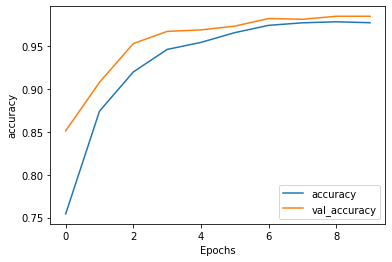

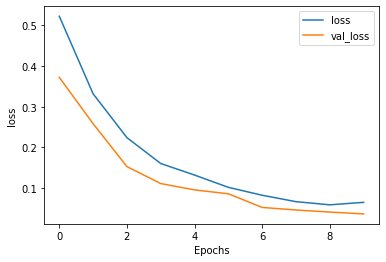

In [ ]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

In [ ]:
#Function to predict
def sentence_trial(sentence_to_try):
  sentence_to_try.lower()
  sequences = tokenizer.texts_to_sequences(sentence_to_try)
  padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

  one_hot = model_lstm.predict(padded)
  #print(one_hot)

  one_hot = one_hot.tolist()
  #one_hot_positive = one_hot_positive.tolist()

  #predictions = []

  #predictions.append(one_hot_negative)
  #predictions.append(one_hot_positive)

  predictions = np.array(one_hot).ravel().tolist()

  for l in predictions:
    calc = l

  #print(calc)

  #return calc

#Will return a tuple of the predicted sentiment and its prediction value
  if calc < 0.52:
    return "positive", calc
  else:
    return "negative", calc

In [ ]:
#Negative words
sentence_trial("produk kurang baik nggak puas")
sentence_trial("jelek hasil kerjaannya nggak pesen lagi")
sentence_trial("nggak mau order lagi jelek hasilnya")
sentence_trial("mereka tidak berusaha cukup keras untuk mendapatkan hasil terbaik dalam proyek ini")
sentence_trial("nggak ramah orangnya nggak mau order lagi")

('negative', 0.6680595874786377)

In [ ]:
#Positive words
sentence_trial("hasilnya mantap")
sentence_trial("produknya luar biasa")
sentence_trial("keren banget pokoknya")
sentence_trial("hasilnya sangat baik dan saya sangat puas keren")
sentence_trial("jadinya keren banget sangat baik")

('positive', 0.45570123195648193)

In [136]:
#Rating trial
star = input("Masukan bintang: ")
word = input("Masukan feedback: ")
word_result = sentence_trial(word)

#Checks if result is positive
if word_result[0] == "positive":
#Checks the star
  if int(star) > 3:
    result = float(star) + word_result[1]
    if result > 5:
      result = 5
      print(result, 2)
    else:
      print(round(result, 2))
  elif int(star) == 3:
    result = float(star) + word_result[1]
    print(round(result, 2))
    
if word_result[0] == "negative":
    if int(star) < 3:
      result = float(star) - word_result[1]
      print(round(result), 2)
    elif int(star) == 3:
      result = float(star) - (word_result[1]*0.1)
      print(round(result, 2))
      

Masukan bintang: 3
Masukan feedback: hasilnya tidak bagus nggak mau lagi
2.93


In [ ]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model_lstm.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape) 

(1000, 16)


In [ ]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

In [ ]:
# Import files utilities in Colab
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')